# Midterm Exam - MLC Fall 2024

Total points for the midterm exam: 15. More detailed instructions are in the PDF file in Brightspace.

Please note: Copying and pasting other people's work is absolutely prohibited. Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

## Part A - Ensemble Methods (30% + 10% with optional extra)

### Task 1: Create and Visualize Decision Trees (extra 10%)

##### This task 1 (decision trees) is optional, and you can get an extra 10% if you decide to do this task.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import tree
import numpy as np
import os
from sklearn import tree
from IPython.display import Image  
import pydotplus
os.environ["PATH"] += os.pathsep + 'D:/Users/Desktop/Graphviz/bin/'

The provided **Telecom dataset** encompasses diverse parameters associated with telecom customers and aims to predict whether a customer is likely to stay (Contract Closure = 0) or leave (Contract Closure = 1) the telecom service provider. Each row represents a customer, and the columns include various features such state, total miutes of usage internet service, and more. The target variable, "Contract Closure," serves as the binary indicator for customer churn prediction, with 0 indicating the customer stays and 1 indicating the customer leaves the telecom service.

In [2]:
# Load the dataset

data = pd.read_csv("telecom_dataset.csv")
data=data.dropna()

In [3]:
data.head(2)

,State_FIPS,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Contract Closure
0,1,118,510,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
1,1,98,408,0,161.0,117,27.37,190.9,113,16.23,227.7,113,10.25,12.1,4,3.27,4,0


In [4]:
# Split the dataset into features and target variable ("Contract Closure")

# your code here
y=data.loc[:,"Contract Closure"]

# Get the feature space.  We are using only features from before the stop, getting rid of features from during/after the stop like "arrested".
X=data.loc[:,"State_FIPS":"Customer service calls"]
X=pd.get_dummies(X)

In [5]:
# Split data into 80% train, 20% test, random_state=999

# your code here
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=999)


# Print head

# your code here
print(X_train.head())

      State_FIPS  Account length  Area code  Number vmail messages  \
1193          27             173        510                      0   
2512          56              57        408                     39   
2383          51             138        415                      0   
1743          38              82        415                     29   
1396          32             130        510                      0   

      Total day minutes  Total day calls  Total day charge  Total eve minutes  \
1193              291.8              143             49.61              214.3   
2512              213.0              115             36.21              191.1   
2383              251.0              119             42.67               91.2   
1743              163.8               77             27.85              134.9   
1396              154.2              119             26.21              110.2   

      Total eve calls  Total eve charge  Total night minutes  \
1193              134       

#### a. Evaluate the model. Report on in-sample (training data) and out-of-sample (test data).

In [6]:
# Build the decision tree model with max_depth = 2:

# your code here
dt=DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)



# In-sample accuracy:

# your code here
print('In sample accuracy:',dt.score(X_train,y_train))



# Out-of-sample accuracy:

# your code here
print('Out of sample accuracy:',dt.score(X_test,y_test))

In sample accuracy: 0.8792434529582929
Out of sample accuracy: 0.8662790697674418


In [7]:
# Make predictions on the test set

# your code here
X_test_prediction = dt.predict(X_test)
print(X_test_prediction)

[0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 

#### b. Visualize the decision tree.

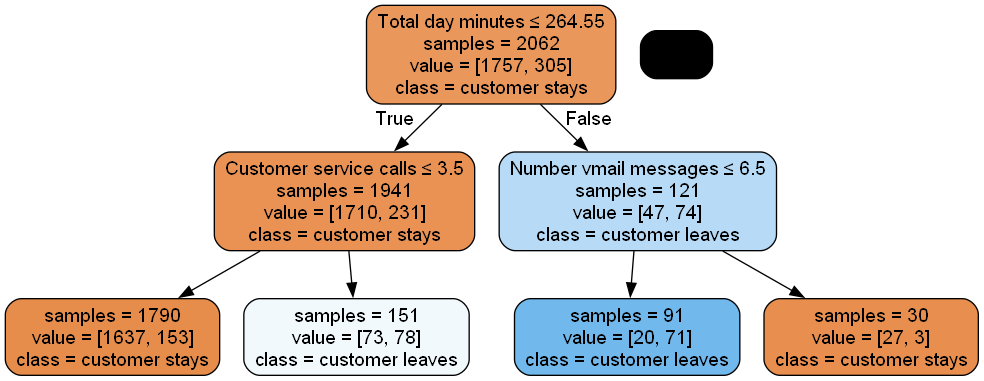

In [8]:
# Visualize the decision tree

# your code here

dot_data = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=['customer stays','customer leaves'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

#### c. List the top 5 most important features in order.

In [9]:
# your code here
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
6,Total day charge,0.43211
16,Customer service calls,0.404648
3,Number vmail messages,0.163242
10,Total night minutes,0.0
15,Total intl charge,0.0


### Task 2: Ensemble Method Implementation (30%)

The goal of this task is to implement a **bagging and a boosting model** . Evaluate their performance on your dataset, providing insights into the differences in their error metrics, and discuss why one might outperform the other in this context.

In [10]:
# Suggested steps:
# 1) Split the data into training and testing sets, ensuring to respect the time series nature if applicable.
# 2) Implement a Bagging Regressor and a Gradient Boosting Regressor.
# 3) Evaluate both models using appropriate metrics for your problem.
# 4) Provide a comparative analysis of their performances.

The **AAPL, V, and GOOG datasets** consists of stock quotes companies, where the "Adj Close" price serves as the target variable, reflecting the adjusted closing price of Apple's stock over a specific period.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Below are several first steps of data processing. Make sure that you understand and follow those steps.

In [12]:
import pandas as pd
import os

# Define the path to the folder and the file names - change if needed
folder_path = ''
file_names = ['AAPL.csv', 'V.csv', 'GOOG.csv']

# Function to load a CSV, transform the 'Dt' column, and set it as the index
def load_and_transform(file_path):
    df = pd.read_csv(file_path)
    df['Dt'] = pd.to_datetime(df['Dt'])
    df.set_index('Dt', inplace=True)
    return df

# Load all dataframes with the date transformations
dataframes = {name.split('.')[0]: load_and_transform(os.path.join(folder_path, name)) for name in file_names}

# Perform a series of left joins to combine the dataframes on their index
df = dataframes['AAPL']
for df_name in ['V', 'GOOG']:
    df = df.join(dataframes[df_name], how='left', lsuffix='_AAPL', rsuffix=f'_{df_name}')

df.head()

,Adj Close_AAPL,Close_AAPL,Div_AAPL,Factor_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Adj Close_V,Close_V,...,Open_V,Volume_V,Adj Close,Close,Div,Factor,High,Low,Open,Volume
Dt,,,,,,,,,,,,,,,,,,,,,
2017-01-03,110.9539,116.15,0.0,1.0,116.330,114.76,115.8000,28781900.0,78.0492,79.50,...,78.76,13785200.0,786.14,786.14,0.0,1.0,789.630,775.800,778.81,1657300.0
2017-01-04,110.8297,116.02,0.0,1.0,116.510,115.75,115.8500,21118100.0,78.6874,80.15,...,79.44,8033100.0,786.90,786.90,0.0,1.0,791.340,783.160,788.36,1073000.0
2017-01-05,111.3933,116.61,0.0,1.0,116.864,115.81,115.9200,22193600.0,79.6102,81.09,...,80.34,7805100.0,794.02,794.02,0.0,1.0,794.480,785.020,786.08,1335200.0
2017-01-06,112.6351,117.91,0.0,1.0,118.160,116.47,116.7789,31751900.0,80.7098,82.21,...,81.30,8898300.0,806.15,806.15,0.0,1.0,807.900,792.204,795.26,1640200.0
2017-01-09,113.6668,118.99,0.0,1.0,119.430,117.94,117.9500,33561900.0,80.2582,81.75,...,82.28,7305300.0,806.65,806.65,0.0,1.0,809.966,802.830,806.40,1274600.0


In [13]:
# Assuming 'df' is your DataFrame and 'Adj Close_AAPL' is the target variable
X = df.drop('Adj Close_AAPL', axis=1)
y = df['Adj Close_AAPL']

# fill NA
X = X.fillna(0)

# Data Splitting, considering its temporal nature
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#### a. Train and test Bagging Model.

In [14]:
# your code here

bagging = BaggingRegressor()
bagging.fit(X_train, y_train)

y_test_pre_bag = bagging.predict(X_test)

#### b. Train and test Boosting Model.

In [15]:
# your code here

boosting = GradientBoostingRegressor()
boosting.fit(X_train, y_train)

y_test_pre_boost = boosting.predict(X_test)

#### c. Evaluate the model and report (use Mean squared error; Mean absolute error; and R2).  

In [16]:
# Model Evaluation using more metrics

# your code here:
mse_bagging = mean_squared_error(y_test, y_test_pre_bag)
mae_bagging = mean_absolute_error(y_test, y_test_pre_bag)
r2_bagging =  r2_score(y_test, y_test_pre_bag)

mse_boosting = mean_squared_error(y_test, y_test_pre_boost)
mae_boosting = mean_absolute_error(y_test, y_test_pre_boost)
r2_boosting = r2_score(y_test, y_test_pre_boost)


# Printing out the performance metrics with explanations

# your code here
performance_metrics = pd.DataFrame({
    'Bagging Model':[mse_bagging, mae_bagging, r2_bagging],
    'Boosting Model':[mse_boosting, mae_boosting, r2_boosting],
    'Explaination':['If MSE is small, the prediction is good.',
                    'If MAE is small, the prediction is good.',
                    'If R² is close to 1, the prediction is good.'],
    'Result': ['Boosting Model is better' if mse_bagging > mse_boosting else 'Bagging Model is better',
               'Boosting Model is better' if mae_bagging > mae_boosting else 'Bagging Model is better',
               'Boosting Model is better' if abs(1 - r2_bagging) > abs(1 - r2_boosting) else 'Bagging Model is better']
    
}, index=['MSE', 'MAE', 'R²'])
performance_metrics

,Bagging Model,Boosting Model,Explaination,Result
MSE,32.017890,27.131628,"If MSE is small, the prediction is good.",Boosting Model is better
MAE,3.445242,3.103661,"If MAE is small, the prediction is good.",Boosting Model is better
R²,0.896745,0.912502,"If R² is close to 1, the prediction is good.",Boosting Model is better


#### d. Hyperparameter Tuning and Model Optimization.  

In [17]:
# Possible steps:
# 1) Choose an ensemble model for hyperparameter tuning (one with the best performance in a previous step).
# 2) Define a parameter grid to explore.
# 3) Use GridSearchCV to find the optimal parameters.
# 4) Retrain the model using the best parameters and evaluate its performance.

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [19]:
# 1. Choose the model you wish to tune

# your code here
bagging_count = sum(performance_metrics['Result'] == 'Bagging Model is better')
boosting_count = sum(performance_metrics['Result'] == 'Boosting Model is better')

if bagging_count > boosting_count:
    print('Choose Bagging model')
else:
    print('Choose Boosting model')

Choose Boosting model


In [20]:
# 2. Define a comprehensive grid of parameters to search

# your code here
parameters_grid = {
    'min_samples_split': [5,7,9],   # 1% of the number of sample data
    'max_depth': [6, 8, 10],
    'n_estimators': range(50,80,10)
    
}

# 3. Perform grid search and identify the best parameters

# your code here
Boosting = GradientBoostingRegressor()
gr = GridSearchCV(estimator=Boosting, param_grid=parameters_grid, cv=tscv)
gbr=gr.fit(X_train, y_train)
print(gbr.best_estimator_)

GradientBoostingRegressor(max_depth=10, min_samples_split=9, n_estimators=70)


In [21]:
# 4. Get the best parameters from the grid search

# your code here
best_params = {
    'min_samples_split': 9,
    'max_depth': 10,
    'n_estimators':70,
}


# 5. Retrain the model with the best parameters and evaluate its performance

# your code here
Boosting_best = GradientBoostingRegressor(**best_params)
Boosting_best.fit(X_train, y_train)

test_pre_best = Boosting_best.predict(X_test)

mse_boosting_best = mean_squared_error(y_test, test_pre_best)
mae_boosting_best = mean_absolute_error(y_test, test_pre_best)
r2_boosting_best = r2_score(y_test, test_pre_best)

# 6. Output the performance metrics

# your code here

best_metrics = pd.DataFrame({
    'Best Boosting Model':[mse_boosting_best, mae_boosting_best, r2_boosting_best],
    'Orginal Boosting Model':[mse_boosting, mae_boosting, r2_boosting]
    
}, index=['MSE', 'MAE', 'R²'])
best_metrics

,Best Boosting Model,Orginal Boosting Model
MSE,26.965175,27.131628
MAE,3.219445,3.103661
R²,0.913039,0.912502


#### e. Conceptual Questions
- Describe the trade-offs between bias and variance when using ensemble methods.
- How does increasing the diversity of models in an ensemble affect its performance?
- Discuss the implications of temporal dependencies in time series data on the choice and performance of ensemble methods.

In [22]:
# your answer to questions here

##### (1) Describe the trade-offs between bias and variance when using ensemble methods.

If model is too sample, the variance may be very small and the bias may be very high; It is because a simple model will ignore the relationship between data thus to cause a high bias. 

On the contrary, a over-complex model will lead to a low bias and a high variance; It is because a complex simple will pay more attention on the noise, leading a low bias. But its performance on different data sets may fluctuate greatly, casuing a high variance.

So, a great ensemble model with appropriate varibles could decrease the bias and variance at the same time.

##### (2) How does increasing the diversity of models in an ensemble affect its performance?
Increasing the diversity of models will improve the performance of an ensemble because different models could find unique relationship and mode among the data and variances.


##### (3) Discuss the implications of temporal dependencies in time series data on the choice and performance of ensemble methods.
In ensemble methods, if many models are not sensitive to change of data over data, then the final model may not have a good performance due to the neglect of temporal dependencies. Therefore, we need to choose the appropriate model.

If we use different models, all of which focus on temporal dependencies, ensemble methods enable us to gain more information about the correlation between time and data.


## Part B - Support Vector Machines (40%)

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn import svm

### Task 1: SVM Decision Boundaries and C Parameter Investigation (20%)

**The Iris dataset** is a classic in the field of machine learning and statistics, introduced by the British statistician and biologist Ronald Fisher in 1936. The dataset consists of 150 samples from three species of Iris flowers: Iris setosa, Iris versicolor, and Iris virginica. Each sample is described by four features: the length and the width of the sepals and petals, in centimeters. See [wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set).

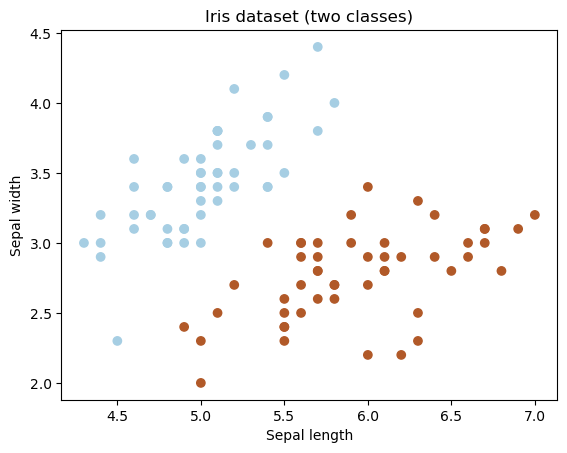

In [24]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization
y = iris.target

# In the first task, we will consider only 2 classes for binary classification
X = X[y != 2]
y = y[y != 2]

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset (two classes)')
plt.show()

#### a. Consider the dataset above. Based on the visual inspection of the plot provided, how would you train an SVM model for this dataset? Explain your choice of kernel and parameters.

In [25]:
# your answer here

# Kernel: Based on the visual inspection, we can divide the dots into two parts with a straight line. Therefore, the kernel = 'linear'
# Parameters: I think C could be 100000. Because the data set is linearly separable, a larger C value can ensure that the model fits the data better.

In [26]:
clf=svm.SVC(kernel='linear',C=100000)
clf.fit(X,y)

SVC(C=100000, kernel='linear')

**Assuming you chose to train a linear SVM with C=100000; answer the following five questions:**

#### b. Report the separating hyperplane.

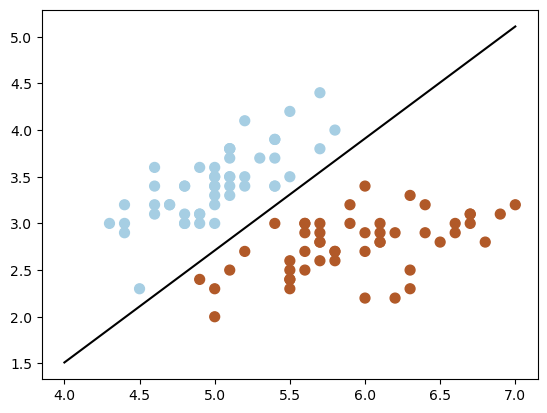

In [27]:
# your answer here

w=clf.coef_[0]
a=-w[0]/w[1]
x1 = np.linspace(4, 7)
x2=a*x1 - (clf.intercept_[0])/w[1]

# plot the separating hyperplane
plt.gca()
plt.plot(x1, x2, 'k-')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=50)

plt.axis('tight')
plt.show()

#### c. List the support vectors.

[5.5 3.5] [5.4 3. ]


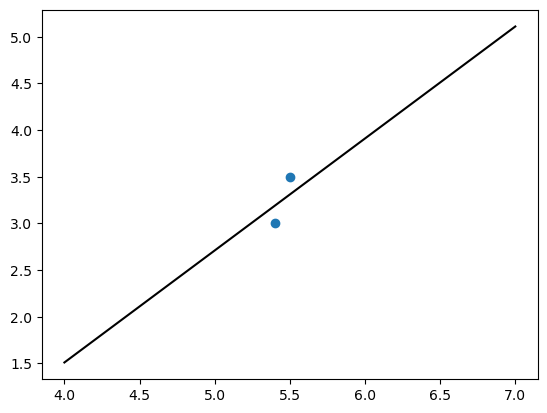

In [28]:
# your answer here

b1=clf.support_vectors_[0]
b2 = clf.support_vectors_[-1]
print(b1,b2)

#plot the support vectors
plt.gca()
plt.plot(x1, x2, 'k-')
plt.scatter([b1[0], b2[0]], [b1[1], b2[1]])
plt.axis('tight')
plt.show()

#### d. Calculate the upper and lower hyperplanes (lines) of the margin

[1.6999994  1.77346881 1.84693822 1.92040763 1.99387705 2.06734646
 2.14081587 2.21428528 2.2877547  2.36122411 2.43469352 2.50816293
 2.58163235 2.65510176 2.72857117 2.80204058 2.87550999 2.94897941
 3.02244882 3.09591823 3.16938764 3.24285706 3.31632647 3.38979588
 3.46326529 3.53673471 3.61020412 3.68367353 3.75714294 3.83061236
 3.90408177 3.97755118 4.05102059 4.12449001 4.19795942 4.27142883
 4.34489824 4.41836765 4.49183707 4.56530648 4.63877589 4.7122453
 4.78571472 4.85918413 4.93265354 5.00612295 5.07959237 5.15306178
 5.22653119 5.3000006 ] [1.31999944 1.39346885 1.46693826 1.54040767 1.61387709 1.6873465
 1.76081591 1.83428532 1.90775474 1.98122415 2.05469356 2.12816297
 2.20163239 2.2751018  2.34857121 2.42204062 2.49551004 2.56897945
 2.64244886 2.71591827 2.78938768 2.8628571  2.93632651 3.00979592
 3.08326533 3.15673475 3.23020416 3.30367357 3.37714298 3.4506124
 3.52408181 3.59755122 3.67102063 3.74449005 3.81795946 3.89142887
 3.96489828 4.03836769 4.11183711 4.18530

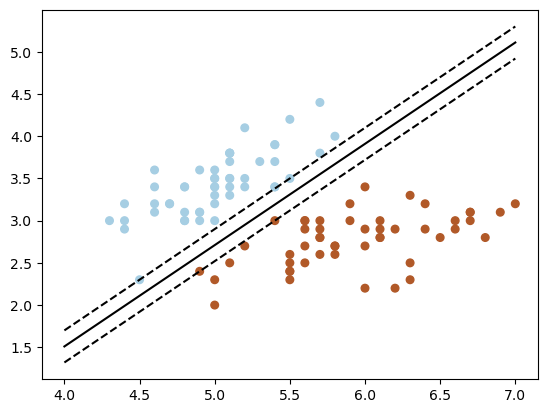

In [29]:
# your answer here


b=clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])

b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])

#report upper and lower hyperplanes lines
print(x2_down,x2_up)

# plot the line, the points, and the nearest vectors to the plane
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=30)

plt.axis('tight')
plt.show()

#### e. Compute the width of the margin

In [30]:
# your answer here
print(2/(np.sqrt(w[0]**2+w[1]**2)))

0.24319362349362694


#### f. Using the provided SVM model with a high value of C (e.g., C=100000), plot the decision boundaries and margins. Then, adjust the SVM model by setting a very small value for the constant C (e.g., C=0.01). How do you expect this change to affect the margin width? Plot the new decision boundaries and margins and compare them to the previous plot to validate your expectations. Interpret the results

In [31]:
# Suggested steps:
# 1) Train a linear SVM with a large C value (optional if you already did)
# 2) Plot the decision boundaries and margins
# 3) Now train another linear SVM with a small C value
# 4) Plot the new decision boundaries and margins

In [32]:
# Train a linear SVM with a large C value (optional since we already did)

# your code here
clf=svm.SVC(kernel='linear',C=10**15)
clf.fit(X,y)

w=clf.coef_[0]
a=-w[0]/w[1]
x1 = np.linspace(4, 7)
x2=a*x1 - (clf.intercept_[0])/w[1]


b1=clf.support_vectors_[0]
b2 = clf.support_vectors_[-1]
print(b1,b2)


b=clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])

b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])

[5.5 3.5] [5.4 3. ]


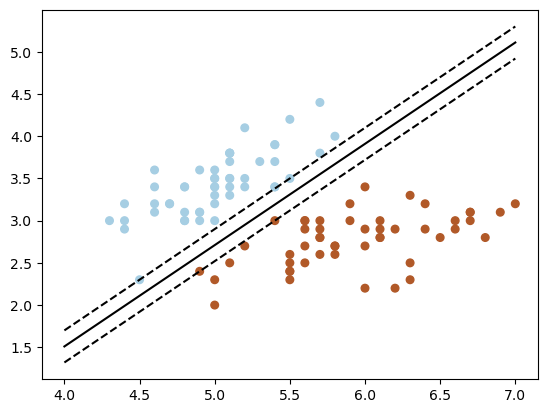

The width of margin:  0.24319362349362694


In [33]:
# your plot here


# plot the line, the points, and the nearest vectors to the plane
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=30)

plt.axis('tight')
plt.show()


margin=2/(np.sqrt(w[0]**2+w[1]**2))
print('The width of margin: ', margin)

In [34]:
# Now train another linear SVM with a small C value

# your code here
# Train a linear SVM with a large C value (optional since we already did)

# your code here
clf=svm.SVC(kernel='linear',C=0.01)
clf.fit(X,y)

w=clf.coef_[0]
a=-w[0]/w[1]
x1 = np.linspace(4, 7)
x2=a*x1 - (clf.intercept_[0])/w[1]


b1=clf.support_vectors_[0]
b2 = clf.support_vectors_[-1]
print(b1,b2)


b=clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])

b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])

[5.1 3.5] [5.7 2.8]


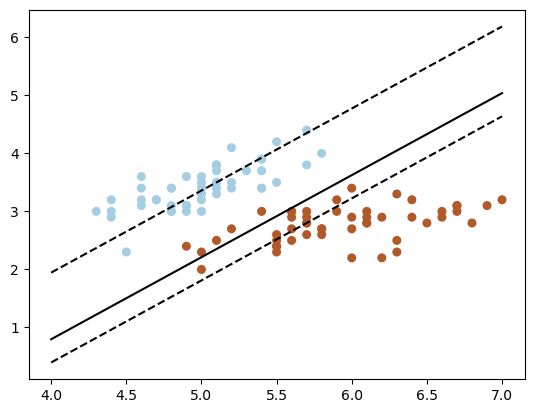

The width of margin:  3.5111177813742875


In [35]:
# your plot here


# plot the line, the points, and the nearest vectors to the plane
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=30)

plt.axis('tight')
plt.show()

# your answer here
# your answer here
margin = 2/(np.sqrt(w[0]**2+w[1]**2))
print('The width of margin: ', margin)

From the result, we can see that the smaller the C is, the bigger the margin width is.

It is because when C is big, the degree of punishment for classification errors is stricter. On the contary, when C is small, the classifier will be "indifferent" to classification errors, so the margin won't distinguish carefully. Therefore, when C is too small, the margin will become bigger.

### Task 2: Training using SVM (20%)

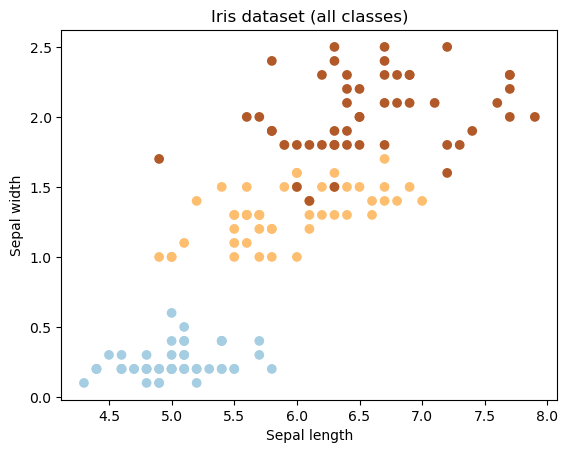

In [36]:
# Load Iris dataset
iris = load_iris(as_frame=True)
df = iris.frame
X = df[['sepal length (cm)','petal width (cm)']].values  # Select the first two features for visualization purposes
y = df.target

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset (all classes)')
plt.show()

#### a. Train a linear SVM and a non-linear SVM with RBF kernel using the training set. Use the default arguments, make predictions and calculate accuracy on test set.

In [37]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [38]:
# Standardize the data

#your code here
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# Train a linear SVM

linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_train,y_train)

SVC(kernel='linear')

In [40]:
# Train a non-linear SVM with RBF kernel
rbf_svc = svm.SVC(kernel='rbf') 
rbf_svc.fit(X_train,y_train)

SVC()

In [41]:
# Make predictions and calculate accuracy on test out-of-sample set

#your code here
# linear SVM
y_pre=linear_svc.predict(X_test)
correct_linear = 1.0*(y_pre==np.asarray(y_test)).sum()/len(y_test)
print("(linear SVM) Out of sample, we successfully predict {} percent of the data".format(correct_linear*100))

y_pre=rbf_svc.predict(X_test)
correct_rbf = 1.0*(y_pre==np.asarray(y_test)).sum()/len(y_test)
print("(RBF SVM) Out of sample, we successfully predict {} percent of the data".format(correct_rbf*100))

(linear SVM) Out of sample, we successfully predict 94.0 percent of the data
(RBF SVM) Out of sample, we successfully predict 96.0 percent of the data


In [42]:
# Plot decision boundaries (example code below)

def plot_decision_boundary(clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)

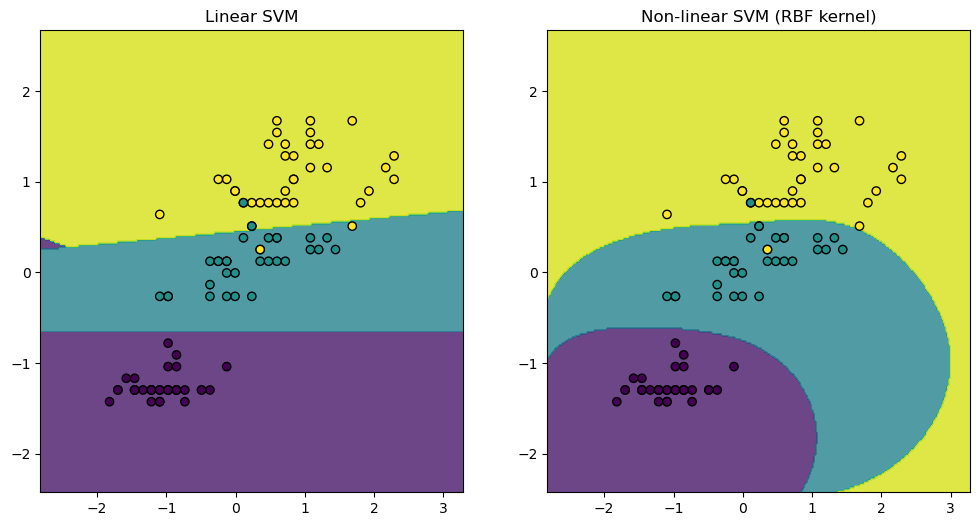

In [43]:
# Plot decision boundaries (example code below)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(linear_svc, X_train, y_train, "Linear SVM")
plt.subplot(1, 2, 2)
plot_decision_boundary(rbf_svc, X_train, y_train, "Non-linear SVM (RBF kernel)")
plt.show()

#### b. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [46]:
# Train your model.

#your code here
clf_poly = svm.SVC(kernel='poly') 
clf_poly.fit(X_train, Y_train)

# Report IS and OS results.

#your code here
#IS
y_pre=clf_poly.predict(X_train)
print("In sample, we successfully predict {} percent of the data".format((y_pre==Y_train).sum()*100/len(Y_train)))

#OS
y_pre=clf_poly.predict(X_test)
print("Out of sample, we successfully predict {} percent of the data".format((y_pre==Y_test).sum()*100/len(Y_test)))


In sample, we successfully predict 94.0 percent of the data
Out of sample, we successfully predict 94.0 percent of the data


#### c. Try polynomials of degree 1,2,3,4,5. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below. Plot the graph of "Accuracy vs log(C)" for each degree.

In [47]:
import math

In [48]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset.
# Denote the remaining training data by (X_train_1, Y_train_1).

X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, y_train, test_size=0.33, random_state=1)

for degree=1:
When C_opt=3.3739373045307954, we get max accuracy: 0.7878787878787878


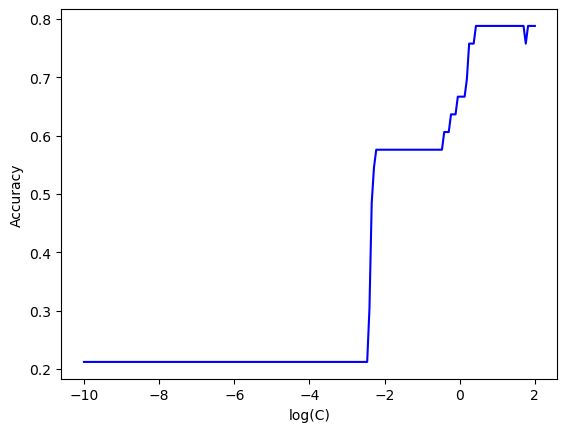

for degree=2:
When C_opt=9.404666762279701, we get max accuracy: 0.9393939393939394


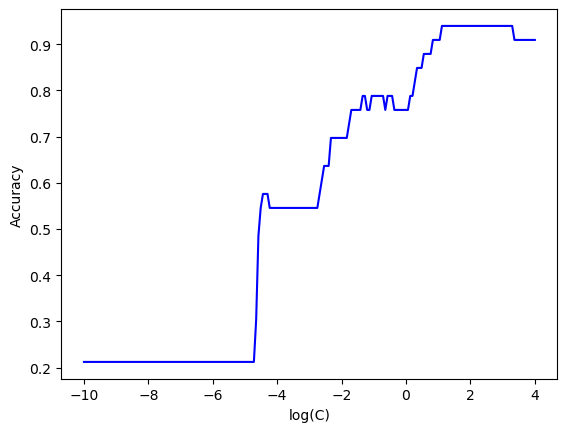

for degree=3:
When C_opt=12.714124843510733, we get max accuracy: 0.9393939393939394


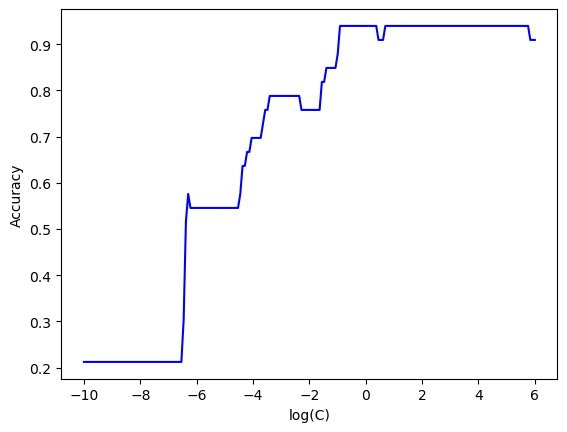

for degree=4:
When C_opt=7.615234297520747, we get max accuracy: 0.9393939393939394


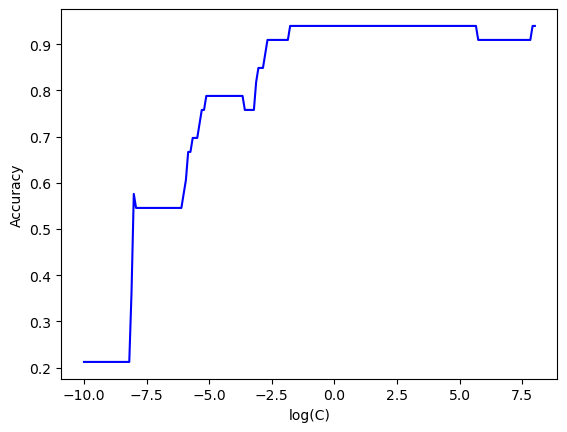

for degree=5:
When C_opt=12051.988241748213, we get max accuracy: 0.9696969696969697


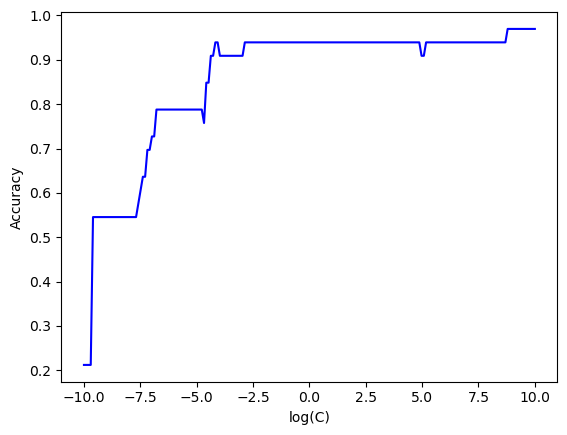

In [49]:
for degree in range(1,6):
    print("for degree={}:".format(degree))
    C=[np.exp(i) for i in np.linspace(-10,2*degree,200)]  # When degree increases, we could use a larger value of C.
    OS_validation=[]
    for c in C:
        clf = svm.SVC(kernel='poly',C=c,degree=degree) 
        clf.fit(X_train_1, Y_train_1)
        correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
        OS_validation.append(correct)
    temp=pd.DataFrame([C,OS_validation]).T
    ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])//2
    C_opt=temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0]
    print("When C_opt={}, we get max accuracy: {}".format(C_opt,temp.iloc[:,1].max()))
    
    C=[np.log(y) for y in C] # for a better graph
    plt.gca()
    plt.plot(C,OS_validation,'b',)
    plt.ylabel('Accuracy')
    plt.xlabel('log(C)')
    plt.show()

#### d.  Choose the optimal degree and the optimal regularization constant C based on these graphs. Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected.

In [50]:
# From the plot above, we can see that the degree5 offers the largest accuracy.

In [51]:
poly_svc = svm.SVC(kernel='poly', degree=5, C=12051.988)
poly_svc.fit(X_train, Y_train)

SVC(C=12051.988, degree=5, kernel='poly')

In [52]:
#Report out-of-sample result

#your code here

correct=1.0*(poly_svc.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print("Out of sample, we successfully predict {} percent of the data".format((correct)*100))


Out of sample, we successfully predict 96.0 percent of the data


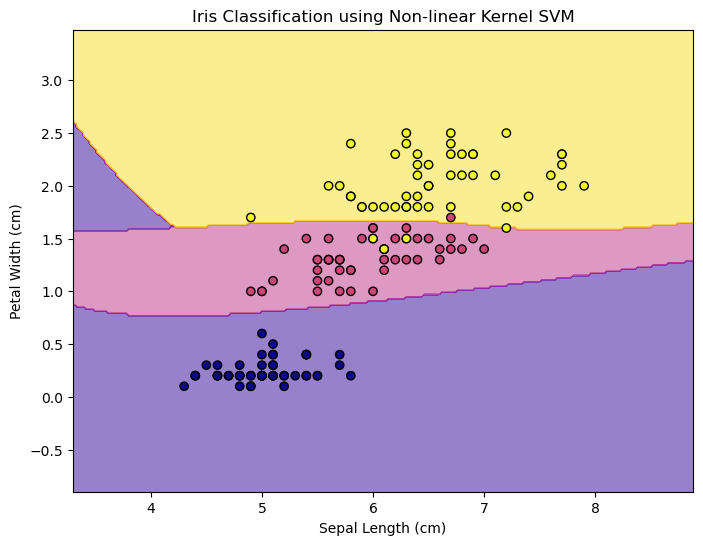

In [53]:
# Plot decision boundary for polynomial SVM using the function (example code below)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='plasma')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='plasma')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Classification using Non-linear Kernel SVM')
plt.show()

## Part C - Hierarchical and K-Means Clustering (30%)

For hierarchical and K-Means clustering, use the **Mall Customer Segmentation Data** from Kaggle. For leader clustering, simulate streaming data or use a large dataset divided into chunks to mimic streaming data, such as transaction data or sensor data streams.

In [54]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


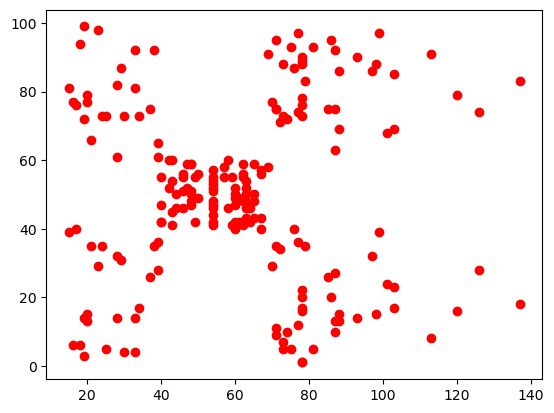

In [55]:
# Start from selecting relevant features for clustering: 
# We will be working with two features: 'Annual Income (k$)' and 'Spending Score (1-100)'

#your code here
X = df.iloc[:, 3:5] 
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='r')
plt.show()

In [56]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

### Task 1:  Implement K-Means algorithm (10%)

In [57]:
# Implement K-Means

kmeans = KMeans()
kmeans.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

[269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37265.86520484346, 30259.65720728547, 25029.25342493588, 21829.13563877983]


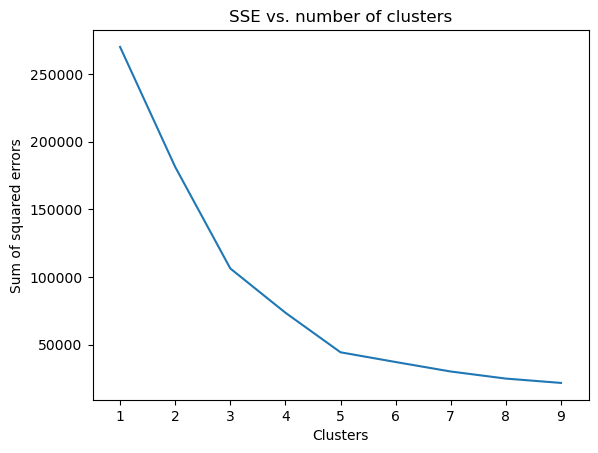

In [58]:
# Check the best number of cluster with any method you like (simple Elbow method is good):

#your code here
# As an alternative, look for an elbow in the within-cluster SSE (k-means example):
SSE = []
for i in range(1,10):
    km = KMeans(n_clusters=i, n_init=10)
    res=km.fit(X)
    SSE.append(res.inertia_)
print(SSE)

plt.gca()
plt.plot(range(1,10),SSE)
plt.xlabel("Clusters")
plt.ylabel("Sum of squared errors")
plt.title("SSE vs. number of clusters")
plt.xlim(0.5,9.5)
plt.show()

From the result, we can see that the best number of cluster is 5.

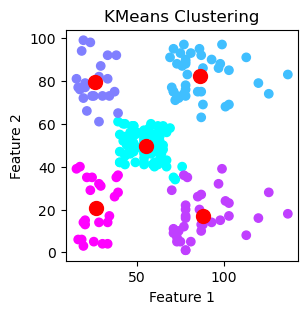

In [59]:
# Plotting clusters

#your code here

# plot points and cluster assigments
km = KMeans(random_state=234,n_clusters=5, n_init=10)
res=km.fit(X)

plt.figure(figsize=(3, 3))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=res.labels_, cmap=plt.cm.cool)
plt.scatter(res.cluster_centers_[:, 0], res.cluster_centers_[:, 1], c="r", s=100)
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### Task 2:  Implement a Hierarchical Clustering algorithm (10%)

In [60]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

In [61]:
# For Hierarchical Clustering, you can perform Agglomerative Clustering

clustering = AgglomerativeClustering(n_clusters=5)
#your code here
X = X.astype(float)
clustering.fit(X)
cluster_labels = clustering.labels_

Text(0, 0.5, 'Feature 2')

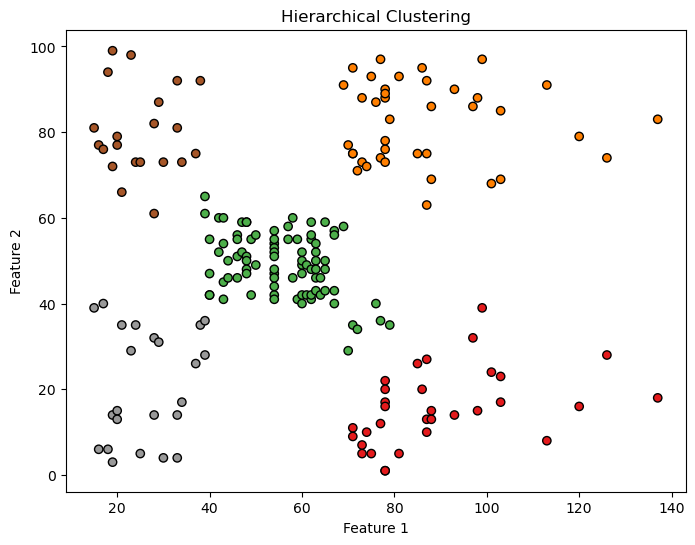

In [62]:
# Plot the clusters (for 2D data)

#your code here
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='Set1', marker='o', edgecolors='k')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

### Task 3: Evaluate and report clustering quality using silhouette scores (10%).

Silhouette score is a tool for assessing the appropriateness of clustering results by providing a quantitative measure of how well-defined and distinct the clusters are. The Silhouette Score quantifies how well a data point fits into its assigned cluster and how distinct it is from other clusters. 

In [63]:
from sklearn.metrics import silhouette_score

# For K-Means

#your code here
silhouette_avg_K = silhouette_score(X, res.labels_)
print("The average silhouette_score is : {}".format(silhouette_avg_K))

# For Hierarchical Model

#your code here
silhouette_avg_H = silhouette_score(X, cluster_labels)
print("The average silhouette_score is : {}".format(silhouette_avg_H))

The average silhouette_score is : 0.553931997444648
The average silhouette_score is : 0.5529945955148897


#### Discuss which method works the best for this dataset. Elaborate if those methods are good fit for this data.

#your answer here

From the result, we can see that the Hierarchical Model works better for this dataset because of its higher silhouette score.

Explain: 

(1) The K-Means makes hard cluster assignments while Hierarchical Model makes soft assignments. The dots in the plot are comparative disperse, so I think the Hierarchical Model is better.

(2) Customer behavior and preference may have multiple levels. For example, the Annual Income (k$) and Spending Score (1-100) are differnt. Hierarchical clustering can capture this hierarchy, divide customers into groups with different levels, and provide information about the relationships between these groups.